## Introduction

For my capstone project, I will be looking at the College Scoreboard dataset for the 2017-2018 academic year.  

I will be focusing on the information on the average rate of student completion for four-year institutions. I will be checking for a relationship between this rate and the type of institution (public, private and non-profit, or private and for-profit) and how students at a particular institution pay for their education (whether they received a Pell grant, took out a federal loan, or did neither).


## Hypotheses

H0a - There is no significant difference between the average rate of completion for public four-year institutions, for-profit private institutions, and non-profit privat intitutions.

H1a - There is a significant difference between the average rate of completion for public four-year institutions, for-profit private institutions, and non-profit privat intitutions.

H0b - There is no significant difference in the average rate of completion between students that recieve a Pell Grant, students that take out federal loans, and students that do neither.

H1b = There is a significant difference in the average rate of completion between students that recieve a Pell Grant, students that take out federal loans, and students that do neither.

## Data

The data comes from the College Scoreboard website and contains 7,112 observations and 1,977 variables. For simplicity I have extracted the columns that are most relevant to my analyses, narrowing the number of variables down to 5. I have also chosen to only consider data on 4-year institutions. Null values were not incduded in data visualizations and statistical analyses. 

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

C:\Users\cepyp\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
#Import dataset
coll17_18 = pd.read_csv('MERGED2017_18_PP.csv')
print(coll17_18.info())
#Copy variables of interest into a seperate dataset
slim_df = coll17_18[['C150_4_POOLED', 'C150_4_PELL', 'C150_4_LOANNOPELL', 'C150_4_NOLOANNOPELL', 'CONTROL']].copy()
print (slim_df.info())

C:\Users\cepyp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (31,1726,1727,1728,1729,1815,1817,1823,1830,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Columns: 1977 entries, UNITID to OMENRUP_PARTTIME_POOLED_SUPP
dtypes: float64(1894), int64(14), object(69)
memory usage: 107.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 5 columns):
C150_4_POOLED          2399 non-null float64
C150_4_PELL            2303 non-null float64
C150_4_LOANNOPELL      2092 non-null float64
C150_4_NOLOANNOPELL    2309 non-null float64
CONTROL                7112 non-null int64
dtypes: float64(4), int64(1)
memory usage: 277.9 KB
None


In [10]:
#I'm deciding to drop my null values since my variables of interest contain relatively few of them
slim_df.dropna(inplace= True)

## Results

In [11]:
#Create datasets filtered by type of instution.
pub_inst = slim_df.loc[slim_df['CONTROL'] == 1]
priv_np_inst = slim_df.loc[slim_df['CONTROL'] == 2]
priv_fp_inst = slim_df.loc[slim_df['CONTROL'] == 3]

Here you can see that students that attended <b>private non-profit institutions</b> completed their 4-year degree at a higher rate than students of public and private for-profit institutions.

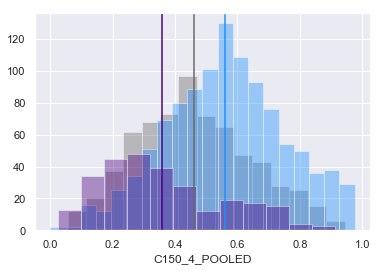

In [12]:
#Histrogram plotting the pooled average completion rates for different types of institutions.
sns.distplot(pub_inst['C150_4_POOLED'].dropna(), kde=False, color='dimgray')
sns.distplot(priv_np_inst['C150_4_POOLED'].dropna(), kde=False, color='dodgerblue')
sns.distplot(priv_fp_inst['C150_4_POOLED'].dropna(), kde=False, color='indigo')

#Plot the distribution means
plt.axvline(pub_inst['C150_4_POOLED'].dropna().mean(), color = 'dimgray')
plt.axvline(priv_np_inst['C150_4_POOLED'].dropna().mean(), color = 'dodgerblue')
plt.axvline(priv_fp_inst['C150_4_POOLED'].dropna().mean(), color = 'indigo')

In [13]:
#Use descriptive statistics to evaluate normality
print(stats.describe(pub_inst['C150_4_POOLED'].dropna()))
print(stats.describe(priv_np_inst['C150_4_POOLED'].dropna()))
print(stats.describe(priv_fp_inst['C150_4_POOLED'].dropna()))

#Based on the normal values of skewness and kurtosis I will perform a One-Way ANOVA test
print(stats.f_oneway(pub_inst['C150_4_POOLED'].dropna(), priv_np_inst['C150_4_POOLED'].dropna(), priv_fp_inst['C150_4_POOLED'].dropna()))


DescribeResult(nobs=670, minmax=(0.0559, 0.9438), mean=0.4618911940298507, variance=0.033699595452981734, skewness=0.24619911870687955, kurtosis=-0.4616758146444906)
DescribeResult(nobs=1096, minmax=(0.0, 0.9759), mean=0.5605741788321168, variance=0.03647658757923375, skewness=-0.06286360273515662, kurtosis=-0.376829156572386)
DescribeResult(nobs=277, minmax=(0.0255, 0.912), mean=0.3587783393501805, variance=0.037919381485638046, skewness=0.6539125412056852, kurtosis=-0.36632606523825517)
F_onewayResult(statistic=147.0507453719083, pvalue=2.1909883298004181e-60)


The low p-value on my One-way ANOVA score implies that <b>there is a statistically significant relationship between institute type and an institute's rate of completion</b>.

Looking at <b>students who recieved a Pell grant</b>, the trend of students at private insitutions finishing at a higher rate persists.

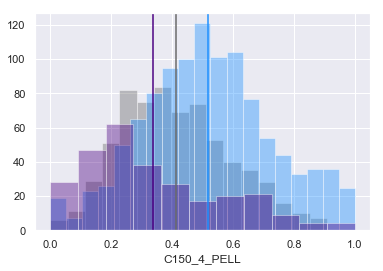

In [14]:
#Histogram plotting the average completion rates for Pell grant recipients attending different types of institutions.
sns.distplot(pub_inst['C150_4_PELL'].dropna(), kde=False, color='dimgray')
sns.distplot(priv_np_inst['C150_4_PELL'].dropna(), kde=False, color='dodgerblue')
sns.distplot(priv_fp_inst['C150_4_PELL'].dropna(), kde=False, color='indigo')

#Plot the distribution means
plt.axvline(pub_inst['C150_4_PELL'].dropna().mean(), color = 'dimgray')
plt.axvline(priv_np_inst['C150_4_PELL'].dropna().mean(), color = 'dodgerblue')
plt.axvline(priv_fp_inst['C150_4_PELL'].dropna().mean(), color = 'indigo')

In [15]:
#Use descriptive statistics to evaluate normality
print(stats.describe(pub_inst['C150_4_PELL'].dropna()))
print(stats.describe(priv_np_inst['C150_4_PELL'].dropna()))
print(stats.describe(priv_fp_inst['C150_4_PELL'].dropna()))

#Based on the normal values of skewness and kurtosis I will perform a One-Way ANOVA test
print(stats.f_oneway(pub_inst['C150_4_PELL'].dropna(), priv_np_inst['C150_4_PELL'].dropna(), priv_fp_inst['C150_4_PELL'].dropna()))

DescribeResult(nobs=670, minmax=(0.0, 0.9091), mean=0.4139114925373134, variance=0.03264028442676751, skewness=0.3543256667732047, kurtosis=-0.36037172193876765)
DescribeResult(nobs=1096, minmax=(0.0, 1.0), mean=0.5170837591240875, variance=0.04565233560813919, skewness=0.0762140620988609, kurtosis=-0.3126971100524658)
DescribeResult(nobs=277, minmax=(0.0, 1.0), mean=0.33874873646209386, variance=0.05079000192774551, skewness=0.757525775972177, kurtosis=-0.11704511903159531)
F_onewayResult(statistic=107.71330663559881, pvalue=3.384512369092134e-45)


We see the same trend in <b>students that took out a loan and didn't recieve a Pell grant</b>, with those students who attended a private institution having the highest completion rate.

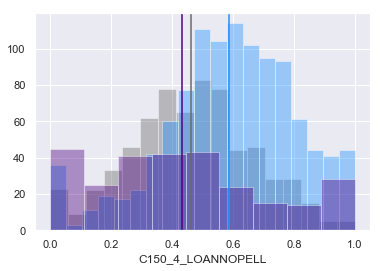

In [16]:
#Histogram plotting the average completion rates for students that took out a federal loan and didn't recieve a Pell grant by type of institution.
sns.distplot(pub_inst['C150_4_LOANNOPELL'].dropna(), kde=False, color='dimgray')
sns.distplot(priv_np_inst['C150_4_LOANNOPELL'].dropna(), kde=False, color='dodgerblue')
sns.distplot(priv_fp_inst['C150_4_LOANNOPELL'].dropna(), kde=False, color='indigo')

#Plot the distribution means
plt.axvline(pub_inst['C150_4_LOANNOPELL'].dropna().mean(), color = 'dimgray')
plt.axvline(priv_np_inst['C150_4_LOANNOPELL'].dropna().mean(), color = 'dodgerblue')
plt.axvline(priv_fp_inst['C150_4_LOANNOPELL'].dropna().mean(), color = 'indigo')

In [17]:
#Use decriptive statistics to evaluate normality
print(stats.describe(pub_inst['C150_4_LOANNOPELL'].dropna()))
print(stats.describe(priv_np_inst['C150_4_LOANNOPELL'].dropna()))
print(stats.describe(priv_fp_inst['C150_4_LOANNOPELL'].dropna()))

#Based on the normal values of skewness and kurtosis I will perform a One-Way ANOVA test
print(stats.f_oneway(pub_inst['C150_4_LOANNOPELL'].dropna(), priv_np_inst['C150_4_LOANNOPELL'].dropna(), priv_fp_inst['C150_4_LOANNOPELL'].dropna()))

DescribeResult(nobs=670, minmax=(0.0, 1.0), mean=0.46332223880597023, variance=0.04082275880215514, skewness=-0.01205680826079558, kurtosis=-0.1920929373888698)
DescribeResult(nobs=1096, minmax=(0.0, 1.0), mean=0.5883248175182483, variance=0.048501961557044296, skewness=-0.510064451896586, kurtosis=0.26934509349848)
DescribeResult(nobs=277, minmax=(0.0, 1.0), mean=0.43230685920577616, variance=0.08615888730785329, skewness=0.3474796334698777, kurtosis=-0.5883073398169447)
F_onewayResult(statistic=91.24145422370826, pvalue=1.1157640816866465e-38)


Students that attended a private non-profit institution also completed at the highest rate when looking at <b>students who didn't take out loans and didn't recieve a Pell grant</b>.

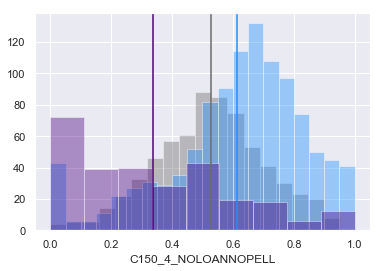

In [18]:
#Histogram plotting the average completion rates for students that didn't take out a federal loan and didn't recieve a Pell grant by type of institution.
sns.distplot(pub_inst['C150_4_NOLOANNOPELL'].dropna(), kde=False, color='dimgray')
sns.distplot(priv_np_inst['C150_4_NOLOANNOPELL'].dropna(), kde=False, color='dodgerblue')
sns.distplot(priv_fp_inst['C150_4_NOLOANNOPELL'].dropna(), kde=False, color='indigo')

#Plot the distribution means
plt.axvline(pub_inst['C150_4_NOLOANNOPELL'].dropna().mean(), color = 'dimgray')
plt.axvline(priv_np_inst['C150_4_NOLOANNOPELL'].dropna().mean(), color = 'dodgerblue')
plt.axvline(priv_fp_inst['C150_4_NOLOANNOPELL'].dropna().mean(), color = 'indigo')


In [19]:
#Use descriptive statistics to evaluate normality 
print(stats.describe(pub_inst['C150_4_NOLOANNOPELL'].dropna()))
print(stats.describe(priv_np_inst['C150_4_NOLOANNOPELL'].dropna()))
print(stats.describe(priv_fp_inst['C150_4_NOLOANNOPELL'].dropna()))

#Based on the normal values of skewness and kurtosis I will perform a One-Way ANOVA test
print(stats.f_oneway(pub_inst['C150_4_NOLOANNOPELL'].dropna(), priv_np_inst['C150_4_NOLOANNOPELL'].dropna(), priv_fp_inst['C150_4_NOLOANNOPELL'].dropna()))


DescribeResult(nobs=670, minmax=(0.0, 0.9523), mean=0.5266447761194031, variance=0.0314181114151217, skewness=-0.13089866606689393, kurtosis=-0.14074103346482847)
DescribeResult(nobs=1096, minmax=(0.0, 1.0), mean=0.6121545620437956, variance=0.05136839910245643, skewness=-0.8311767772282204, kurtosis=0.5184844662314454)
DescribeResult(nobs=277, minmax=(0.0, 1.0), mean=0.33648664259927796, variance=0.07347808703107832, skewness=0.5786757782285858, kurtosis=-0.36179157753223823)
F_onewayResult(statistic=179.91026792126155, pvalue=1.0975646014540237e-72)


Here I'm looking at how payment type affects completion rate. There isn't as much variance when looking at this variable, but we can see that <b>students who recieved neither loans nor a Pell grant</b> had a higher completion rate.

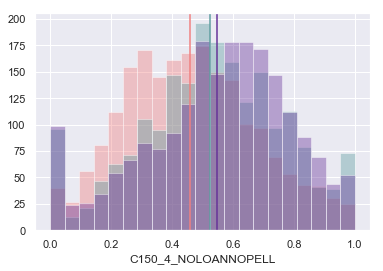

In [20]:
#Histogram plotting the average completion rates by payment type.
sns.distplot(slim_df['C150_4_PELL'].dropna(), kde=False, color='lightcoral')
sns.distplot(slim_df['C150_4_LOANNOPELL'].dropna(), kde=False, color='cadetblue')
sns.distplot(slim_df['C150_4_NOLOANNOPELL'].dropna(), kde=False, color='rebeccapurple')

#Plot the distribution averages
plt.axvline(slim_df['C150_4_PELL'].dropna().mean(), color = 'lightcoral')
plt.axvline(slim_df['C150_4_LOANNOPELL'].dropna().mean(), color = 'cadetblue')
plt.axvline(slim_df['C150_4_NOLOANNOPELL'].dropna().mean(), color = 'rebeccapurple')



In [21]:
#Use descriptive statistics to evaluate normality 
print(stats.describe(slim_df['C150_4_PELL'].dropna()))
print(stats.describe(slim_df['C150_4_LOANNOPELL'].dropna()))
print(stats.describe(slim_df['C150_4_NOLOANNOPELL'].dropna()))

#Based on the normal values of skewness and kurtosis I will perform a One-Way ANOVA test
print(stats.f_oneway((slim_df['C150_4_PELL'].dropna()), (slim_df['C150_4_LOANNOPELL'].dropna()), (slim_df['C150_4_NOLOANNOPELL'].dropna())))

DescribeResult(nobs=2043, minmax=(0.0, 1.0), mean=0.45906896720509055, variance=0.04647840490329129, skewness=0.2420432700609585, kurtosis=-0.4132102541584626)
DescribeResult(nobs=2043, minmax=(0.0, 1.0), mean=0.5261766519823788, variance=0.055592977755288715, skewness=-0.21246278464713012, kurtosis=-0.2618335137799237)
DescribeResult(nobs=2043, minmax=(0.0, 1.0), mean=0.546735291238375, variance=0.056196215546279, skewness=-0.4851934755058883, kurtosis=-0.2085863051118162)
F_onewayResult(statistic=81.39777448063074, pvalue=1.291068540296396e-35)


The low p-value on my One-way ANOVA score implies that <b>there is a statistically significant relationship between payment type and an institute's rate of completion</b>.

Looking at <b>students at public institutions</b>, students who neither recieved a loan nor a Pell grant continue to have the highest completion rate.

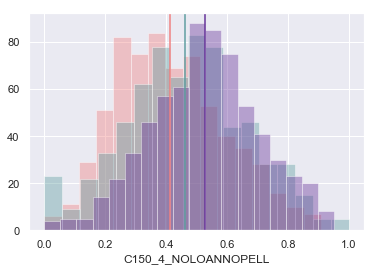

In [22]:
#Histogram to plot the distributions for payment types in public institutions.
sns.distplot(pub_inst['C150_4_PELL'].dropna(), kde=False, color='lightcoral')
sns.distplot(pub_inst['C150_4_LOANNOPELL'].dropna(), kde=False, color='cadetblue')
sns.distplot(pub_inst['C150_4_NOLOANNOPELL'].dropna(), kde=False, color='rebeccapurple')

#Plot the distribution averages
plt.axvline(pub_inst['C150_4_PELL'].dropna().mean(), color = 'lightcoral')
plt.axvline(pub_inst['C150_4_LOANNOPELL'].dropna().mean(), color = 'cadetblue')
plt.axvline(pub_inst['C150_4_NOLOANNOPELL'].dropna().mean(), color = 'rebeccapurple')

In [23]:
#Use descriptive statistics to evaluate normality 
print(stats.describe(pub_inst['C150_4_PELL'].dropna()))
print(stats.describe(pub_inst['C150_4_LOANNOPELL'].dropna()))
print(stats.describe(pub_inst['C150_4_NOLOANNOPELL'].dropna()))

#Based on the normal values of skewness and kurtosis I will perform a One-Way ANOVA test
print(stats.f_oneway((pub_inst['C150_4_PELL'].dropna()), (pub_inst['C150_4_LOANNOPELL'].dropna()), (pub_inst['C150_4_NOLOANNOPELL'].dropna())))


DescribeResult(nobs=670, minmax=(0.0, 0.9091), mean=0.4139114925373134, variance=0.03264028442676751, skewness=0.3543256667732047, kurtosis=-0.36037172193876765)
DescribeResult(nobs=670, minmax=(0.0, 1.0), mean=0.46332223880597023, variance=0.04082275880215514, skewness=-0.01205680826079558, kurtosis=-0.1920929373888698)
DescribeResult(nobs=670, minmax=(0.0, 0.9523), mean=0.5266447761194031, variance=0.0314181114151217, skewness=-0.13089866606689393, kurtosis=-0.14074103346482847)
F_onewayResult(statistic=61.19866072927242, pvalue=1.587400054981021e-26)


Looking at <b>students at private non-profit institutions</b> we see the same trend, with those who recieved neither Pell grants nor loans having the highest completion rate.

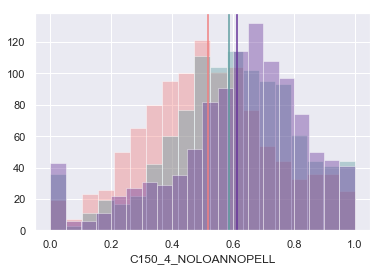

In [24]:
#Histogram to plot the distributions for payment types in private non-profit instituions
sns.distplot(priv_np_inst['C150_4_PELL'].dropna(), kde=False, color='lightcoral')
sns.distplot(priv_np_inst['C150_4_LOANNOPELL'].dropna(), kde=False, color='cadetblue')
sns.distplot(priv_np_inst['C150_4_NOLOANNOPELL'].dropna(), kde=False, color='rebeccapurple')

#Plot the distribution averages
plt.axvline(priv_np_inst['C150_4_PELL'].dropna().mean(), color = 'lightcoral')
plt.axvline(priv_np_inst['C150_4_LOANNOPELL'].dropna().mean(), color = 'cadetblue')
plt.axvline(priv_np_inst['C150_4_NOLOANNOPELL'].dropna().mean(), color = 'rebeccapurple')


In [25]:

#Use descriptive statistics to evaluate normality 
print(stats.describe(priv_np_inst['C150_4_PELL'].dropna()))
print(stats.describe(priv_np_inst['C150_4_LOANNOPELL'].dropna()))
print(stats.describe(priv_np_inst['C150_4_NOLOANNOPELL'].dropna()))

#Based on the normal values of skewness and kurtosis I will perform a One-Way ANOVA test
print(stats.f_oneway( (priv_np_inst['C150_4_PELL'].dropna()), (priv_np_inst['C150_4_LOANNOPELL'].dropna()), (priv_np_inst['C150_4_NOLOANNOPELL'].dropna())))

DescribeResult(nobs=1096, minmax=(0.0, 1.0), mean=0.5170837591240875, variance=0.04565233560813919, skewness=0.0762140620988609, kurtosis=-0.3126971100524658)
DescribeResult(nobs=1096, minmax=(0.0, 1.0), mean=0.5883248175182483, variance=0.048501961557044296, skewness=-0.510064451896586, kurtosis=0.26934509349848)
DescribeResult(nobs=1096, minmax=(0.0, 1.0), mean=0.6121545620437956, variance=0.05136839910245643, skewness=-0.8311767772282204, kurtosis=0.5184844662314454)
F_onewayResult(statistic=55.28703413387769, pvalue=2.42329939391515e-24)


Things start looking differently when we focus on students from <b>private for-profit institutions</b>. Here, <b>students who recieved a loan but not a Pell grant</b> completed at the highest rate.

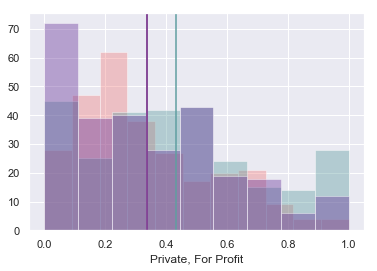

In [26]:
#Histogram to plot the distributions for payment types in private for-profit institutions
sns.distplot(priv_fp_inst['C150_4_PELL'].dropna(), kde=False, color='lightcoral')
sns.distplot(priv_fp_inst['C150_4_LOANNOPELL'].dropna(), kde=False, color='cadetblue',)
sns.distplot(priv_fp_inst['C150_4_NOLOANNOPELL'].dropna(), kde=False, color='rebeccapurple', axlabel = 'Private, For Profit')

#Plot the distribution averages
plt.axvline(priv_fp_inst['C150_4_PELL'].dropna().mean(), color = 'lightcoral')
plt.axvline(priv_fp_inst['C150_4_LOANNOPELL'].dropna().mean(), color = 'cadetblue')
plt.axvline(priv_fp_inst['C150_4_NOLOANNOPELL'].dropna().mean(), color = 'rebeccapurple')


In [27]:
#Use descriptive statistics to evaluate normality 
print(stats.describe(priv_fp_inst['C150_4_PELL'].dropna()))
print(stats.describe(priv_fp_inst['C150_4_LOANNOPELL'].dropna()))
print(stats.describe(priv_fp_inst['C150_4_NOLOANNOPELL'].dropna()))

#Based on the normal values of skewness and kurtosis I will perform a One-Way ANOVA test
print(stats.f_oneway((priv_fp_inst['C150_4_PELL'].dropna()), (priv_fp_inst['C150_4_LOANNOPELL'].dropna()), (priv_fp_inst['C150_4_NOLOANNOPELL'].dropna())))

DescribeResult(nobs=277, minmax=(0.0, 1.0), mean=0.33874873646209386, variance=0.05079000192774551, skewness=0.757525775972177, kurtosis=-0.11704511903159531)
DescribeResult(nobs=277, minmax=(0.0, 1.0), mean=0.43230685920577616, variance=0.08615888730785329, skewness=0.3474796334698777, kurtosis=-0.5883073398169447)
DescribeResult(nobs=277, minmax=(0.0, 1.0), mean=0.33648664259927796, variance=0.07347808703107832, skewness=0.5786757782285858, kurtosis=-0.36179157753223823)
F_onewayResult(statistic=11.80768681650857, pvalue=8.78523503696538e-06)


## Discussion 

- Across all forms of analysis used, a common trend was found in student completion rates. <b>Private non-profit institutions</b> had the highest average completion rates, followed by public institutions, and then by private for-profit. This result suggests that private non-profit institutions have a better rate of student success than schools funded in other ways.

- We also found a significant relationship between payment method and completion rate, Pell grant recipents having a lower completion rate than the pooled average and <b>students that didn't recieve Pell grant</b> having higher completion rates than average, whether they took out a federal loan or not.



- This data can be used by students in deciding which type of school would be the most secure investment.
- School administrators can also use this information in making admissions decisions as well as in figuring out which students would be more likely to need a bit more support.
- The Pell grant is a federal aid program that aims to provide financial assistance to lower income undergraduate students.
- As these students are more likely to have to deal with other major responsibilities outside of their studies, it is understandable that they would have a harder time finishing their four-years.

## Further Research

- It would be interesting to dig deeper into the data and look at:
    - How these relationships may change based on the cost of tuition
    - How these relationships may change based on other forms of aid (i.e., scholarships)